In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima


In [3]:
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
df=pd.read_csv('co2_mm_mlo_2022.csv',sep=',',comment='#',index_col=False)
df.index = pd.to_datetime(df[['year','month']].apply(lambda x: f'{x[0]}-{x[1]}',axis=1))
df

C:\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,year,month,decimal date,average,interpolated,trend,ndays
1958-03-01,1958,3,1958.2027,315.70,314.43,-1,-9.99
1958-04-01,1958,4,1958.2877,317.45,315.16,-1,-9.99
1958-05-01,1958,5,1958.3699,317.51,314.71,-1,-9.99
1958-06-01,1958,6,1958.4548,317.24,315.14,-1,-9.99
1958-07-01,1958,7,1958.5370,315.86,315.18,-1,-9.99
...,...,...,...,...,...,...,...
2021-11-01,2021,11,2021.8750,415.01,417.05,30,0.36
2021-12-01,2021,12,2021.9583,416.71,417.46,28,0.48
2022-01-01,2022,1,2022.0417,418.19,417.84,29,0.73
2022-02-01,2022,2,2022.1250,419.28,418.36,27,0.92


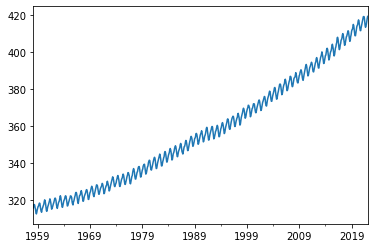

In [6]:
df['average'].plot()
avg=df['average']

In [7]:
df.index.freq='MS'

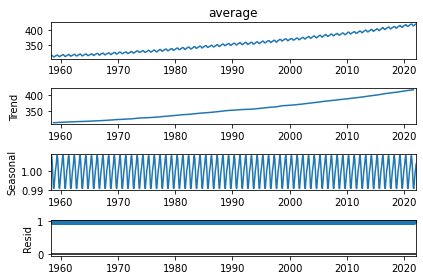

In [8]:
seasonalDecomposition=seasonal_decompose(avg,model='mul')
seasonalDecomposition.plot();

In [9]:
auto_arima(avg, seasonal=True, m=12, trace=True).summary

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=488.228, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2503.427, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1704.374, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2510.500, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=807.253, Time=1.52 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=533.818, Time=3.22 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=550.119, Time=3.59 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1522.553, Time=0.45 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=640.143, Time=3.31 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=514.365, Time=4.28 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=493.404, Time=1.45 sec


C:\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 690, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\anaconda3\lib\site-packages\statsmodels\ba

 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=497.047, Time=1.85 sec
 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=484.439, Time=2.01 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=1512.654, Time=0.96 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=816.892, Time=1.63 sec
 ARIMA(2,1,3)(2,0,1)[12] intercept   : AIC=470.500, Time=3.83 sec
 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=648.339, Time=3.44 sec
 ARIMA(2,1,3)(2,0,2)[12] intercept   : AIC=465.773, Time=4.66 sec
 ARIMA(2,1,3)(1,0,2)[12] intercept   : AIC=494.823, Time=4.60 sec
 ARIMA(1,1,3)(2,0,2)[12] intercept   : AIC=463.065, Time=4.59 sec
 ARIMA(1,1,3)(1,0,2)[12] intercept   : AIC=516.787, Time=3.43 sec
 ARIMA(1,1,3)(2,0,1)[12] intercept   : AIC=500.444, Time=3.04 sec
 ARIMA(1,1,3)(1,0,1)[12] intercept   : AIC=497.966, Time=1.68 sec
 ARIMA(0,1,3)(2,0,2)[12] intercept   : AIC=476.352, Time=4.02 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=4.10 sec
 ARIMA(1,1,4)(2,0,

<function pmdarima.arima.arima.ARIMA.summary(self)>

In [12]:
train=avg.iloc[:-12]
test=avg.iloc[-12:]
test

2021-04-01    419.05
2021-05-01    419.13
2021-06-01    418.94
2021-07-01    416.96
2021-08-01    414.47
2021-09-01    413.30
2021-10-01    413.93
2021-11-01    415.01
2021-12-01    416.71
2022-01-01    418.19
2022-02-01    419.28
2022-03-01    418.81
Freq: MS, Name: average, dtype: float64

In [14]:
model=SARIMAX(train, order=(0,1,3), seasonal_order=(1,0,1,12))
results=model.fit()

In [16]:
results

In [17]:
start=len(train)
end=start+len(test)-1
predictions=results.predict(start=start, end=end, dynamic=False).rename('SARIMA(2,1,1)(0,1,0,12)')


<AxesSubplot:>

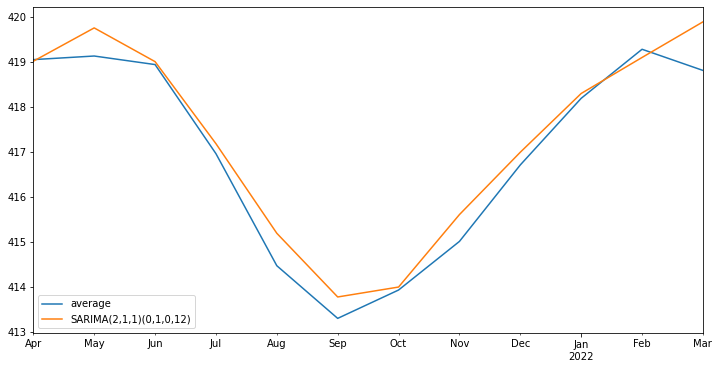

In [18]:
ax=test.plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)

In [21]:
mean_absolute_percentage_error(test,predictions)

0.0008913572782347107